In [37]:
%load_ext autoreload 
%autoreload 2

import os, sys
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(os.path.join(os.getcwd(), ".."))

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import importlib
import model as md
import view as vw

importlib.reload(md)
importlib.reload(vw)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\Артем\Desktop\Вуз\Аспирантура\Диссертация\Алгоритм\Relaxation_frequency_phase_algorithm\notebooks\Complex_ms\..


<module 'view' from 'c:\\Users\\Артем\\Desktop\\Вуз\\Аспирантура\\Диссертация\\Алгоритм\\Relaxation_frequency_phase_algorithm\\view\\__init__.py'>

In [38]:
dir = os.path.join(project_root, "data","microcap")

folder_names = [
    name for name in os.listdir(dir)
    if os.path.isdir(os.path.join(dir, name))
]

folder_paths = [os.path.join(dir, name) for name in folder_names]

In [39]:
U_mass=[]
I_mass=[]
t_mass=[]

for i in range(0,len(folder_paths),1):
    
    U_path = os.path.join(folder_paths[i], "U.CSV")
    I_path= os.path.join(folder_paths[i], "I.CSV")

    t,U = md.make_microcap_data_list(U_path)
    t,I = md.make_microcap_data_list(I_path)

    U_mass.append(U)
    I_mass.append(I)
    t_mass.append(t)
    

In [40]:
vw.show_I_U_3(t_mass[0], U_mass[0],I_mass[0])

In [41]:
Kde_maxpoint=[]
Kde_hilbert =[]
Kde_FFT     =[]
Kde_lockin  =[]
Kde_xcorr   =[]

for i in range (0,len(U_mass),1):

    print(i)
    F,V = md.get_spectrum3(t_mass[i],U_mass[i])
    F_peak_calc = F[np.argmax(V)]

    time_maxpoint,  phase_maxpoint  =md.get_phase_maxpoint_diff(t_mass[i], U_mass[i], I_mass[i],F_peak_calc)
    time_hilbert,   phase_hilbert   =md.get_phase_hilbert(t_mass[i], U_mass[i], I_mass[i], F_peak_calc)
    time_FFT,       phase_FFT       = md.get_phase_FFT(t_mass[i], U_mass[i], I_mass[i], F_peak_calc, n_periods=20, overlap=0.5)
    time_lockin,    phase_lockin    = md.get_phase_lockin(t_mass[i], U_mass[i], I_mass[i], F_peak_calc,5)
    time_xcorr,     phasse_xcorr    = md.get_phase_xcorr2(t_mass[i], U_mass[i], I_mass[i], F_peak_calc)

    Kde_maxpoint.append(md.get_kde_mode(phase_maxpoint))
    Kde_hilbert.append(md.get_kde_mode(phase_hilbert))
    Kde_FFT.append(md.get_kde_mode(phase_FFT))
    Kde_lockin.append(md.get_kde_mode(phase_lockin))
    Kde_xcorr.append(md.get_kde_mode(phasse_xcorr))

0
1
2
3
4
5
6


In [42]:
phase_real=md.get_phase_RC_real(444e3,128.35,869.31e-12)
phase_real_graph= np.full(len(folder_names), phase_real)

In [43]:
Kde_maxpoint_diff   =np.subtract(Kde_maxpoint,phase_real)
Kde_hilbert_diff    =np.subtract(Kde_hilbert ,phase_real)
Kde_FFT_diff        =np.subtract(Kde_FFT     ,phase_real)
Kde_lockin_diff     =np.subtract(Kde_lockin  ,phase_real)
Kde_xcorr_diff      =np.subtract(Kde_xcorr   ,phase_real)


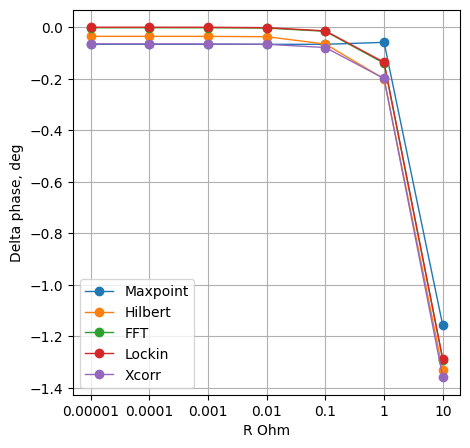

In [44]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot()
front=10

ax1.plot(folder_names, Kde_maxpoint_diff, 'o-', label='Maxpoint', linewidth=1)
ax1.plot(folder_names, Kde_hilbert_diff, 'o-', label='Hilbert', linewidth=1)
ax1.plot(folder_names, Kde_FFT_diff, 'o-', label='FFT', linewidth=1)
ax1.plot(folder_names, Kde_lockin_diff, 'o-', label='Lockin', linewidth=1)
ax1.plot(folder_names, Kde_xcorr_diff, 'o-', label='Xcorr', linewidth=1)


ax1.set_xlabel('R Ohm', fontsize=front)
ax1.set_ylabel('Delta phase, deg', fontsize=front)
ax1.legend(fontsize=front)
ax1.grid(True)